$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\bf R}}
\def\grad{\tn{grad}\,}
\def\curl{\tn{curl}\,}
\def\div{\tn{div}\,}
\def\Im{\tn{Im}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\bf #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
$$

# Maxwell's equations with finite element exterior calculus

## Problem formulation

The aim of this notebook is to explain the finite element discretization of Maxwell's equations based on finite element exterior calculus (FEEC). This method is based on the de Rham complex of finite element spaces: 

<img src="pics/deRham.png" width="550"/> 

This complex is used in the discritzation of Maxwell's equations for the electric field $\bold E$ and the magnetic field $\bold B$:

$$
\ba
 \frac{1}{c^2} \pder{\bold E}{t} - \curl \bold B &= - \mu_0\bold j &&\qquad\quad\tn{(Ampère)} \,, \label{ampere}
 \\[1mm]
 \pder{\bold B}{t} + \curl \bold E &= 0 &&\qquad\quad\tn{(Faraday)} \,,
 \\[1.5mm]
 \div \bold E &= \frac{\varrho}{\eps_0} &&\qquad\quad\tn{(Gauss\,1)} \,, \label{gauss}
 \\[2mm]
 \div \bold B &= 0 &&\qquad\quad\tn{(Gauss\,2)} \,. \label{divB}
\ea
$$

Here, $\bold j$ and $\varrho$ are the given sources, namely the current density and the charge denstiy, respectively. Natural constants are the speed of light $c$, the magnetic constant $\mu_0$ and the dielectric constant $\eps_0$, where $1/c^2 = \eps_0\mu_0$. Taking the divergence of Ampère's law \eqref{ampere}, using that $\div\curl = 0$ and inserting Gauss' law \eqref{gauss} yields

$$
\be
 \pder{\varrho}{t} + \div \bold j = 0\,. \label{charge}
\ee
$$

This is a solvability condition for Maxwell's equations, called "conservation of charge". On the other hand, equation \eqref{charge} implies

$$
\be \label{alltimes}
 \dt{} \left( \div \bold E - \frac{\varrho}{\eps_0} \right) =  \frac{1}{\eps_0\mu_0}\, \div \curl \bold B - \frac{1}{\eps_0} \div \bold j - \frac{1}{\eps_0} \pder{\varrho}{t} = 0\,,
\ee
$$

Similarly,

$$
\be
 \dt{}\, \div \bold B = - \div \curl \bold E = 0\,,
 \ee
$$

which means that the two Gauss laws are satisfied at all times provided that they are satisfied at the initial time. The commuting diagram property of the deRham complex allows for numerical schemes that translate this property to the discrete level exactly (up to machine precision).

Let us start with the one dimensional case (1D). For this we assume that variations of $\bold E$ and $\bold B$ occurr only with respect to the $x$-direction, hence

$$
\be
 \grad = \begin{pmatrix} \pder{}{x} \\ 0 \\ 0  \end{pmatrix} \,,\qquad \curl \bold E = \begin{pmatrix} 0 \\ -\pder{E_z}{x} \\ \pder{E_y}{x} \end{pmatrix}\,,\qquad \div \bold E = \pder{E_x}{x}\,.
\ee
$$

Moreover, let us assume $E_z = B_x = B_y = 0$ and denote $E := E_y$, $j:= j_y$ and $B:= B_z$. Maxwell's equations then read

$$
\ba
 &\frac{1}{c^2} \pder{E_x}{t} = - \mu_0 j_x &&\qquad\quad\tn{(Ampère\,first\,component)} \,, \label{ampere:1Dx}
 \\[1mm]
 &\frac{1}{c^2} \pder{E}{t} + \pder{B}{x} = - \mu_0 j &&\qquad\quad\tn{(Ampère\,second\,component)} \,, \label{ampere:1D}
 \\[1mm]
 &\pder{B}{t} + \pder{E}{x} = 0 &&\qquad\quad\tn{(Faraday)} \,. \label{faraday:1D}
\ea
$$

We assume the domain to be $\Omega = (0,L)$ and suppose homogeneous Dirichlet boundary conditions for $E$ and periodic conditions for $E_x$ and $B$. In order to obtain a weak formulation of \eqref{ampere:1Dx}-\eqref{faraday:1D} we multiply by testfunctions $F_x$, $F$ and $C$ and integrate over $\Omega$:

$$
\ba
 &\frac{1}{c^2} \int_0^L \pder{E_x}{t} F_x\,\tn d x = - \mu_0 \int_0^L j_x F_x\,\tn d x\,, \label{int:1}
 \\[1mm]
 &\frac{1}{c^2} \int_0^L \pder{E}{t} F\,\tn d x + \int_0^L \pder{B}{x} F\,\tn d x = - \mu_0 \int_0^L j \,F\,\tn d x\,, 
 \\[1mm]
 &\int_0^L \pder{B}{t} C\,\tn d x + \int_0^L \pder{E}{x} C\,\tn d x = 0\,. \label{int:3}
\ea
$$

There are multiple possibilities to use this for a weak formulation of \eqref{int:1}-\eqref{int:3}. We choose the following: find $(E_x,E,B)\in H^1\times H^1_0 \times L^2$ such that

$$
\ba
 &\frac{1}{c^2} \int_0^L \pder{E_x}{t} F_x\,\tn d x = - \mu_0 \int_0^L j_x F_x\,\tn d x \qquad &&\forall\, F_x \in H^1\,, \label{weak:1}
 \\[1mm]
 &\frac{1}{c^2} \int_0^L \pder{E}{t} F\,\tn d x - \int_0^L B\,\pder{F}{x} \,\tn d x = - \mu_0 \int_0^L j \,F\,\tn d x \qquad &&\forall\, F \in H^1_0\,, 
 \\[1mm]
 &\int_0^L \pder{B}{t} C\,\tn d x + \int_0^L \pder{E}{x} C\,\tn d x = 0 \qquad &&\forall\, C \in L^2\,. \label{weak:3}
\ea
$$

Remark that we intgrated by parts in the second equation in order to obtain a well defined weak formulation.

## Discretization

The problem \eqref{weak:1}-\eqref{weak:3} contains only first order derivatives. Our aim is to choose solution spaces that satisfy a commuting diagram. A simpler 1D version of the above deRham complex reads as follows:

<img src="pics/deRham1D.png" width="220"/>

The projectors $\Pi_0$ and $\Pi_1$ are chosen such that the diagram is commuting. We shall implement such projectors for Lagrange finite elements and for spline finite elements.

### Lagrange finite elements

Let us start by defining the mesh points over the domian $\Omega$:

In [1]:
import numpy as np

In [2]:
L = 4
N = 2**5
print('L =', L, '\nN =', N)
# domain length and number of mesh points

x = np.linspace(0, L, N)
print('\nx = ', x)
print('\nlen(x) =', len(x))
print()
for i in range(len(x)):
    print('x({0}) = {1:3.2f}'.format(i, x[i]))
# mesh points

L = 4 
N = 32

x =  [0.         0.12903226 0.25806452 0.38709677 0.51612903 0.64516129
 0.77419355 0.90322581 1.03225806 1.16129032 1.29032258 1.41935484
 1.5483871  1.67741935 1.80645161 1.93548387 2.06451613 2.19354839
 2.32258065 2.4516129  2.58064516 2.70967742 2.83870968 2.96774194
 3.09677419 3.22580645 3.35483871 3.48387097 3.61290323 3.74193548
 3.87096774 4.        ]

len(x) = 32

x(0) = 0.00
x(1) = 0.13
x(2) = 0.26
x(3) = 0.39
x(4) = 0.52
x(5) = 0.65
x(6) = 0.77
x(7) = 0.90
x(8) = 1.03
x(9) = 1.16
x(10) = 1.29
x(11) = 1.42
x(12) = 1.55
x(13) = 1.68
x(14) = 1.81
x(15) = 1.94
x(16) = 2.06
x(17) = 2.19
x(18) = 2.32
x(19) = 2.45
x(20) = 2.58
x(21) = 2.71
x(22) = 2.84
x(23) = 2.97
x(24) = 3.10
x(25) = 3.23
x(26) = 3.35
x(27) = 3.48
x(28) = 3.61
x(29) = 3.74
x(30) = 3.87
x(31) = 4.00


In [3]:
type(x)
# this is indeed a numpy array

numpy.ndarray

We want to define the so-called _shape functions_ $\eta_n$ on the reference element $I=[-1,1]$, where $n \in [d]$ and $d$ is the degree of the polynomials. The interval $I$ is thus separated into $d$ elements of equal size, whose interfaces are denoted by $s_n$: 

In [4]:
d = 1
# polynomial degree

s = np.linspace(-1, 1, d + 1)
print('s =',s)
print()
for n in range(len(s)):
    print('s({0}) = {1:3.2f}'.format(n,s[n]))
# mesh on the reference element

s = [-1.  1.]

s(0) = -1.00
s(1) = 1.00


In [5]:
whos

Variable   Type       Data/Info
-------------------------------
L          int        4
N          int        32
d          int        1
i          int        31
n          int        1
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
s          ndarray    2: 2 elems, type `float64`, 16 bytes
x          ndarray    32: 32 elems, type `float64`, 256 bytes


For Lagrange polynomials of degree $d$ we have

$$
\be
 \eta_n(s) = \prod_{m \neq n} \frac{s - s_m}{s_n - s_m}\,.
\ee
$$

Let us implement these as python functions. We will start with _lambda functions_ and then move on to polynomials defined via specialized numpy commands.

In [6]:
η1_0 = lambda s: (1-s)/2
η1_1 = lambda s: (1+s)/2
# note that s here is a dummy to define the function, 
# while the variable s in the namespace is still an ndarray:
print(η1_0(s))
print(η1_1(s))

[1. 0.]
[0. 1.]


In [7]:
η1 = []
print(η1)
η1.append(η1_0)
print(η1)
η1.append(η1_1)
print(η1)
print(η1[0](s))
print(η1[1](s))

[]
[<function <lambda> at 0x7f7144753d08>]
[<function <lambda> at 0x7f7144753d08>, <function <lambda> at 0x7f7144753e18>]
[1. 0.]
[0. 1.]


In [8]:
η2 = []
η2.append(lambda s: s*(s-1)/2)
η2.append(lambda s: 1-s**2)
η2.append(lambda s: s*(s+1)/2)
s1 = s
s2 = np.linspace(-1,1,3)
print('s1 =', s1, 's2 =', s2)
print(η2[0](s2), η2[1](s2), η2[2](s2), sep='\n')

s1 = [-1.  1.] s2 = [-1.  0.  1.]
[ 1. -0.  0.]
[0. 1. 0.]
[-0.  0.  1.]


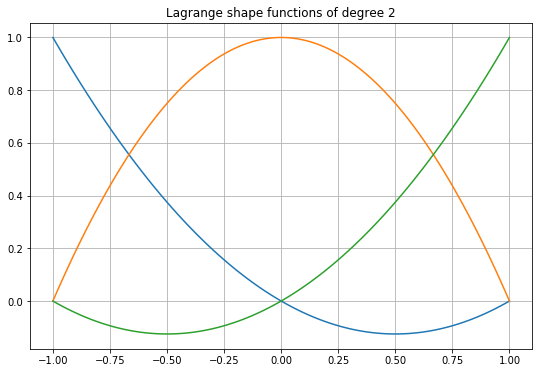

In [9]:
# Let us plot the second order shape functions:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

svec = np.linspace(-1,1,100)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(svec, η2[0](svec))
ax.plot(svec, η2[1](svec))
ax.plot(svec, η2[2](svec))
ax.grid()
ax.set(title='Lagrange shape functions of degree 2')
plt.show()

In [10]:
np?

In [11]:
np.polynomial?

In [12]:
np.poly?

In [13]:
np.poly1d?

In [14]:
np.polyval?

In [15]:
whos

Variable     Type           Data/Info
-------------------------------------
L            int            4
N            int            32
ax           AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
d            int            1
fig          Figure         Figure(648x432)
i            int            31
matplotlib   module         <module 'matplotlib' from<...>/matplotlib/__init__.py'>
n            int            1
np           module         <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt          module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
s            ndarray        2: 2 elems, type `float64`, 16 bytes
s1           ndarray        2: 2 elems, type `float64`, 16 bytes
s2           ndarray        3: 3 elems, type `float64`, 24 bytes
svec         ndarray        100: 100 elems, type `float64`, 800 bytes
x            ndarray        32: 32 elems, type `float64`, 256 bytes
η1           list           n=2
η1_0         function       <function <lambda>

In [16]:
del s, η1, η1_0, η1_1, η2

In [17]:
whos

Variable     Type           Data/Info
-------------------------------------
L            int            4
N            int            32
ax           AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
d            int            1
fig          Figure         Figure(648x432)
i            int            31
matplotlib   module         <module 'matplotlib' from<...>/matplotlib/__init__.py'>
n            int            1
np           module         <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt          module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
s1           ndarray        2: 2 elems, type `float64`, 16 bytes
s2           ndarray        3: 3 elems, type `float64`, 24 bytes
svec         ndarray        100: 100 elems, type `float64`, 800 bytes
x            ndarray        32: 32 elems, type `float64`, 256 bytes


In [18]:
η1 = []
η1.append(np.poly1d([-1/2, 1/2], variable='s'))
print(η1[0])
η1.append(np.poly1d([1/2, 1/2], variable='s'))
print('\neta1[0] evaluated at mesh points:', η1[0](s1))
print('coefficients of eta1[0] are:', η1[0].c, '\nroots of eta1[0] are:', η1[0].r)

 
-0.5 s + 0.5

eta1[0] evaluated at mesh points: [1. 0.]
coefficients of eta1[0] are: [-0.5  0.5] 
roots of eta1[0] are: [1.]


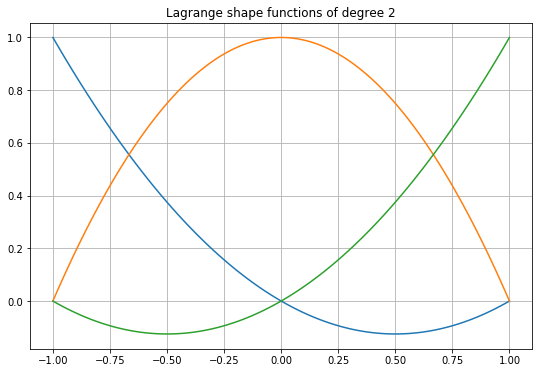

In [19]:
η2 = []
η2.append(np.poly1d([1/2, -1/2, 0], variable='s'))
η2.append(np.poly1d([-1, 0, 1], variable='s'))
η2.append(np.poly1d([1/2, 1/2, 0], variable='s'))
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(svec, η2[0](svec))
ax.plot(svec, η2[1](svec))
ax.plot(svec, η2[2](svec))
ax.grid()
ax.set(title='Lagrange shape functions of degree 2')
plt.show()

In [20]:
Dη2 = []
for i in range(3):
    Dη2.append(np.polyder(η2[i]))
    print(η2[i], Dη2[i])
    Dη2[i] = np.poly1d(Dη2[i], variable='s')
    print(Dη2[i])
    print('-----------------')
# derivatives of polynomials

     2
0.5 s - 0.5 s  
1 x - 0.5
 
1 s - 0.5
-----------------
    2
-1 s + 1  
-2 x
 
-2 s
-----------------
     2
0.5 s + 0.5 s  
1 x + 0.5
 
1 s + 0.5
-----------------


In [21]:
# Let us try to define the Lagrange polynomilas via their roots.
# For this we delete the existing variables holding polynomials:

In [22]:
whos

Variable     Type           Data/Info
-------------------------------------
Dη2          list           n=3
L            int            4
N            int            32
ax           AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
d            int            1
fig          Figure         Figure(648x432)
i            int            2
matplotlib   module         <module 'matplotlib' from<...>/matplotlib/__init__.py'>
n            int            1
np           module         <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt          module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
s1           ndarray        2: 2 elems, type `float64`, 16 bytes
s2           ndarray        3: 3 elems, type `float64`, 24 bytes
svec         ndarray        100: 100 elems, type `float64`, 800 bytes
x            ndarray        32: 32 elems, type `float64`, 256 bytes
η1           list           n=2
η2           list           n=3


In [23]:
del Dη2, η1, η2

In [24]:
whos

Variable     Type           Data/Info
-------------------------------------
L            int            4
N            int            32
ax           AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
d            int            1
fig          Figure         Figure(648x432)
i            int            2
matplotlib   module         <module 'matplotlib' from<...>/matplotlib/__init__.py'>
n            int            1
np           module         <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt          module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
s1           ndarray        2: 2 elems, type `float64`, 16 bytes
s2           ndarray        3: 3 elems, type `float64`, 24 bytes
svec         ndarray        100: 100 elems, type `float64`, 800 bytes
x            ndarray        32: 32 elems, type `float64`, 256 bytes


In [43]:
η1 = []
η1.append(np.poly1d([s1[1]], r=True, variable='s'))

In [44]:
print(η1[0])

 
1 s - 1


In [45]:
η1[0] /= s1[0] - s1[1]

In [46]:
print(η1[0])

 
-0.5 x + 0.5


In [47]:
η1.append(np.poly1d([s1[0]], r=True, variable='s'))
print(η1)

[poly1d([-0.5,  0.5]), poly1d([1., 1.])]


In [48]:
η1[1] /= s1[1] - s1[0]
print(η1[1])

 
0.5 x + 0.5
